![puma logo](https://github.com/nasa/puma/raw/main/doc/source/puma_logo.png)

# Tutorial: Microstructure Generation

The objective of this notebook is to familiarize new users with the main datastructures that stand at the basis of the PuMA project, and outline the functions to compute material properties (please refer to these papers ([1](https://www.sciencedirect.com/science/article/pii/S2352711018300281), [2](https://www.sciencedirect.com/science/article/pii/S235271102100090X)) for more details on the software).

## Installation setup and imports

The first code block will execute the necessary installation and package import. 

If you are running this jupyter notebook locally on your machine, assuming you have already installed the software, then the installation step will be skipped.


In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install 'git+https://github.com/nasa/puma'
    !pip install -q piglet pyvirtualdisplay
    !apt-get -qq install xvfb

import numpy as np
import pumapy as puma
import pyvista as pv
import scipy.ndimage as nd
import os
import sys

if 'google.colab' in str(get_ipython()):
    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(600, 400))
    display.start()  # necessary for pyvista interactive plots
    
else:  # NORMAL JUPYTER NOTEBOOK
    # for interactive slicer (only static allowed on Colab)
    %matplotlib widget

## Introduction

In this tutorial we demonstrate how to generate a microstructure of random intersecting fibers

There are three types of random fiber structures that can be generated: 
1. fully isotropic fibers
2. transverse isotropic fibers
3. 1D fiber structures

Each of these fiber structures has a separate function call. Below we will demonstrate the generation of each of these fiber types

In [4]:
size = (200, 200, 200)  # size of the domain, in voxels. 
radius = 8  # radius of the fibers to be generated, in voxels
nFibers = None  # Can specify either the number of fibers or the porosity
porosity = 0.8  # porosity of the overall structure
length = 200 # Length of the fibers to be generated
max_iter = 3  # optional (default=3), iterations to refine the porosity
allow_intersect = True  # optional (default=True), allow intersection betweem the fibers: if equal to False, the function runs considerably more slowly because    
                        # randomly proposed fibers are rejected if they intersect any other fiber - use with relatively high porosity for reasonable runtimes 
segmented = True  # assign unique IDs to each fiber (if set to False, range will be from 0-255)

ws_fibers_isotropic = puma.generate_random_fibers_isotropic(size, radius, nFibers, porosity, length, allow_intersect=allow_intersect, segmented=segmented)


direction = 'z' # Direction orthogonal to the fibers. For example, 'z' means fibers are oriented in the XY plane. 
variation = 0  # Variability for the angle, relative to the XY plane. Should be between 0 and 90.  

ws_fibers_trans_iso = puma.generate_random_fibers_transverseisotropic(size, radius, nFibers, porosity, direction, variation, length,
                                                                      allow_intersect=allow_intersect, segmented=segmented)

direction = 'z' # Direction of the 1D fibers. 
ws_fibers_1D = puma.generate_random_fibers_1D(size, radius, nFibers, porosity, direction, length, allow_intersect=allow_intersect, segmented=segmented)

Fibers created: 120 --> approximate target: 120 
Assigning orientations ... Done
Volume Fraction for cutoff (0, 0): 0.801737875
Generated random fibers domain with porosity: 0.801737875
Fibers created: 95 --> approximate target: 94  
Assigning orientations ... Done
Volume Fraction for cutoff (0, 0): 0.798490875
Generated random fibers domain with porosity: 0.798490875
Fibers created: 88 --> approximate target: 88 
Assigning orientations ... Done
Volume Fraction for cutoff (0, 0): 0.797312625
Generated random fibers domain with porosity: 0.797312625


The material is now stored in the puma workspace, ws_fibers. By default, the grayscale value of 0 is assigned to the void space and a grayscale value of 1 is assigned to the material. 

Next we will visualize the domain: 

In [6]:
# visualizing the solid domain
puma.render_volume(ws_fibers_isotropic, cutoff=(1, ws_fibers_isotropic.max()), solid_color=None, cmap='jet', notebook=True)
puma.render_volume(ws_fibers_trans_iso, cutoff=(1, ws_fibers_trans_iso.max()), solid_color=None, cmap='jet', notebook=True)
puma.render_volume(ws_fibers_1D, cutoff=(1, ws_fibers_1D.max()), solid_color=None, cmap='jet', notebook=True)

2022-08-08 16:44:11.929 (  61.469s) [           34C65]       vtkThreshold.cxx:96    WARN| vtkThreshold::ThresholdBetween was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=1200, layout=Layout(height='auto', width='100%'), width=1920)

2022-08-08 16:44:31.625 (  81.165s) [           34C65]       vtkThreshold.cxx:96    WARN| vtkThreshold::ThresholdBetween was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=1200, layout=Layout(height='auto', width='100%'), width=1920)

2022-08-08 16:44:33.614 (  83.154s) [           34C65]       vtkThreshold.cxx:96    WARN| vtkThreshold::ThresholdBetween was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=1200, layout=Layout(height='auto', width='100%'), width=1920)

If you would like to visualize the individual slices, this can be done using the plot_slices function

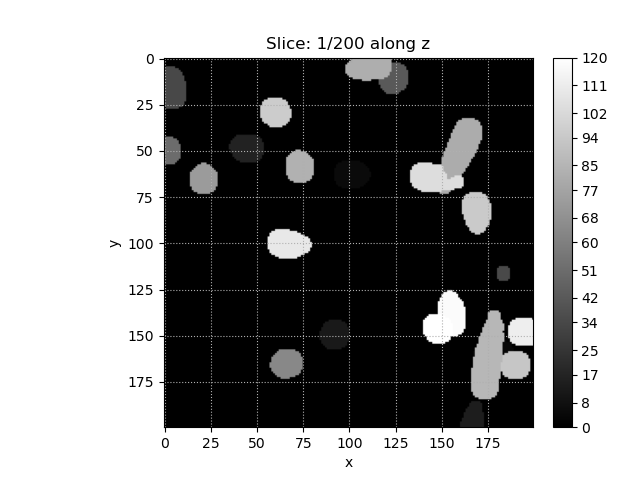

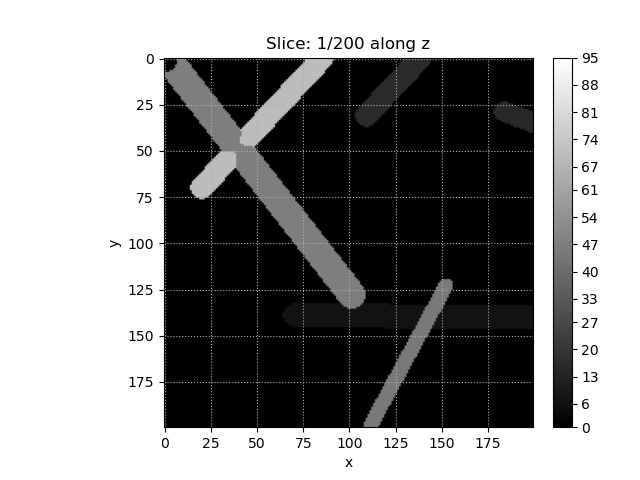

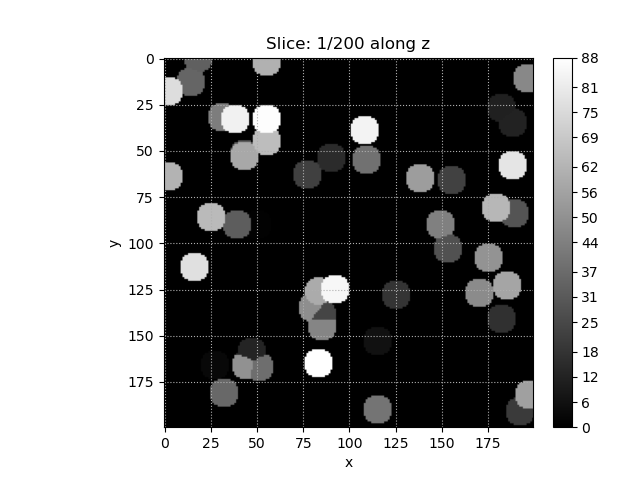

In [7]:
puma.plot_slices(ws_fibers_isotropic)
puma.plot_slices(ws_fibers_trans_iso)
puma.plot_slices(ws_fibers_1D)

## Tutorial: Generating Random Sphere Structures
In this tutorial we demonstrate how to generate a microstructure of random intersecting spheres

We generate the sphere structure and store it into the PuMA workspace class. 

In [ ]:
size = (400, 400, 400)  # size of the domain, in voxels. 
diameter = 20  # diameter of the spheres to be generated, in voxels
porosity = 0.8  # porosity of the overall structure
allow_intersections = True # flag on whether to allow intersections between spheres. 
segmented = True  # assign unique IDs to each sphere (if set to False, range will be from 0-255)
# Note: If allow_intersections is set to false, it will be significantly slower to generate,
#       and will usually require a fairly high porosity value to be generated

ws_spheres = puma.generate_random_spheres(size, diameter, porosity, allow_intersections, segmented=segmented)

The material is now stored in the puma workspace, ws_spheres. By default, the grayscale range of [0,127] corresponds to the void space, and [128,255] contains the material. 

Next we will visualize the domain: 

In [ ]:
# visualizing the solid domain, contained in [128,255] grayscale range. 
puma.render_volume(ws_spheres, cutoff=(1, ws_spheres.max()), cmap='jet', notebook=True)

## Tutorial: Generating Triply Periodic Minimal Surfaces
In this tutorial we demonstrate how to generate a TPMS microstructure 

We generate the TPMS structure. There are three different equations that can be used in the TPMS generator: 

Equation 0: grayscale value = q + sin(wx)*sin(wy)*sin(wz) + sin(wx)*cos(wy)*cos(wz) + cos(wx)*sin(wy)*cos(wz) + cos(wx)*cos(wy)*sin(wz)

Equation 1: grayscale value = q + cos(wx)*sin(wy) + cos(wy)*sin(wz) + cos(wi)*cos(wz)

Equation 2: grayscale value = q + cos(wx) + cos(wy) + cos(wz)

The values of w and q can either be provided as single values, or as a tuple. If a tuple is used, then the first and second values will be the minimum and maximum values for q and w, and the value will vary linearly between the two along the z-axis.

The value of w controls the pore diameter and the value of q controls the porosity

In [ ]:
size = (400, 400, 400)  # size of the domain, in voxels. 
w = 0.08  # value of w in the equations above
q = 0.2  # value of q in the equations above

ws_eq0 = puma.generate_tpms(size, w, q, equation=0, segmented=False)
ws_eq1 = puma.generate_tpms(size, w, q, equation=1, segmented=False)
ws_eq2 = puma.generate_tpms(size, w, q, equation=2, segmented=False)

The material is now stored in the puma workspace. By default, the grayscale range of [0,127] corresponds to the void space, and [128,255] contains the material. 

Next we will visualize slices of the domains: 

In [ ]:
puma.plot_slices(ws_eq0)

In [ ]:
puma.plot_slices(ws_eq1)

In [ ]:
puma.plot_slices(ws_eq2)

Next, we will visualize the 3D domains. To render the domain, the grayscale range corresponding to the material must be specified. In this case, the range of [128,255] corresponds to the material. 

In [ ]:
puma.render_contour(ws_eq0, cutoff=(128, 255), notebook=True)

In [ ]:
puma.render_contour(ws_eq1, cutoff=(128, 255), notebook=True)

In [ ]:
puma.render_contour(ws_eq2, cutoff=(128, 255), notebook=True)

If you would like to segment the domain, that can be done using the binarize function, or the set_material_id function. 

In [ ]:
# binarize(128) sets all grayscale values below 128 to 0, and all grayscale values above and equal to 128 to 1
ws_eq0.binarize(128)
ws_eq1.binarize(128)
ws_eq2.binarize(128)

In [ ]:
puma.plot_slices(ws_eq0)

In [ ]:
puma.plot_slices(ws_eq1)

In [ ]:
puma.plot_slices(ws_eq2)

## Tutorial: Weaves

In order to run this tutorial on Colab, make sure to setup the environment correctly, as explained in the "Installation setup and imports" section.

In this tutorial we demonstrate the creation of weaves using TexGen and how to import them into pumapy.
TexGen python scrips can be simply obtained by either following TexGen tutorials https://github.com/louisepb/TexGenScriptingGuide or by recording the actions in the TexGen GUI (of which there are already
bundled executables for Windows at https://sourceforge.net/projects/texgen/files/). 

Let's start by creating a simple LayerToLayer weave using a TexGen python script. 

In [ ]:
from TexGen.Core import *

NumBinderLayers = 2 
NumXYarns = 3 
NumYYarns = 4 
XSpacing = 1.0
YSpacing = 1.0 
XHeight = 0.2 
YHeight = 0.2 
weave = CTextileLayerToLayer(NumXYarns, NumYYarns, XSpacing, YSpacing, XHeight, YHeight, NumBinderLayers)

#set number of binder / warp yarns
NumBinderYarns = 2
NumWarpYarns = NumXYarns - NumBinderYarns
weave.SetWarpRatio(NumWarpYarns)
weave.SetBinderRatio(NumBinderYarns)

#setup layers: 3 warp, 4 weft
weave.SetupLayers( 3, 4, NumBinderLayers)

#set yarn dimensions: widths / heights
weave.SetYYarnWidths(0.8)
weave.SetYYarnWidths(0.8)
weave.SetBinderYarnWidths(0.4)
weave.SetBinderYarnHeights(0.1)

#define offsets for the two binder yarns
P = [[0, 1, 3, 0],[3, 0, 0, 3]]

#assign the z-positions to the binder yarns
for y in range(NumWarpYarns,NumXYarns): #loop through number of binder yarns
	offset = 0 
	for x in range(NumYYarns): #loop through the node positions	
		weave.SetBinderPosition(x, y, P[y-NumWarpYarns][offset])
		offset += 1

Next we create the domain, i.e. the lengths of the box containing the weave. In this case we will let TexGen figure it out automatically using the AssignDefaultDomain function:

In [ ]:
weave.AssignDefaultDomain()
domain = weave.GetDefaultDomain()

Now we need to specify a folder to export our TexGen weave

In [ ]:
export_path = "out"  # CHANGE THIS PATH

if not os.path.exists(export_path):
    os.makedirs(export_path)

Then, we pass the weave and the domain to the PuMApy exporter, which creates the voxel grid and exports it to the specified directory (expensive step ~1.5-2 mins):

In [ ]:
puma.export_weave_vtu(os.path.join(export_path, "weavetest"), weave, domain, 200)

This can be then read back into a pumapy.Workspace:

In [ ]:
ws = puma.import_weave_vtu(os.path.join(export_path, "weavetest_200"))

And we can volume render it:

In [ ]:
puma.render_volume(ws, cutoff=(1, ws.matrix.max()), solid_color=None, notebook=True, cmap='jet')